## --------------------------------------------------------------------------------------------------------------------------------------
# KELOMPOK 5 A2
## --------------------------------------------------------------------------------------------------------------------------------------
## ANGGOTA KELOMPOK :
### Natalie Fuad                       : 2109106040 (KETUA)
### Agustina Dwi Maharani     : 2109106037
### Sherina Laraswati              : 21091050
## --------------------------------------------------------------------------------------------------------------------------------------

In [31]:
import splitfolders

In [32]:
splitfolders.ratio('flowers/', output="dataset-output", seed=42, ratio=(0.7,0.25,0.05), group_prefix=None)

Copying files: 4894 files [00:06, 743.37 files/s]


## 1. IMPORT LIBRARY

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

## 2. DATA COLLECTING

In [34]:
## 2. DATA COLLECTINGdata_train = image_dataset_from_directory('dataset-output/train',
    label_mode = 'categorical',
    batch_size = 64,
    image_size = (150,150),
    class_names = ['rose', 'sunflower', 'tulip'],
    shuffle = True,
    seed = 47
)

data_val = image_dataset_from_directory('dataset-output/val',
    batch_size =64,                                    
    label_mode = 'categorical',
    class_names = ['rose', 'sunflower', 'tulip'],
    image_size = (150,150),
    shuffle = True,
    seed = 47
)

data_test = image_dataset_from_directory('dataset-output/test',
    batch_size =64,                                     
    label_mode = 'categorical',
    class_names = ['rose', 'sunflower', 'tulip'],
    image_size = (150,150),
    shuffle = True,
    seed = 47
)

Found 3424 files belonging to 3 classes.
Found 1223 files belonging to 3 classes.
Found 247 files belonging to 3 classes.


## 3. DATA PREPROCESSING

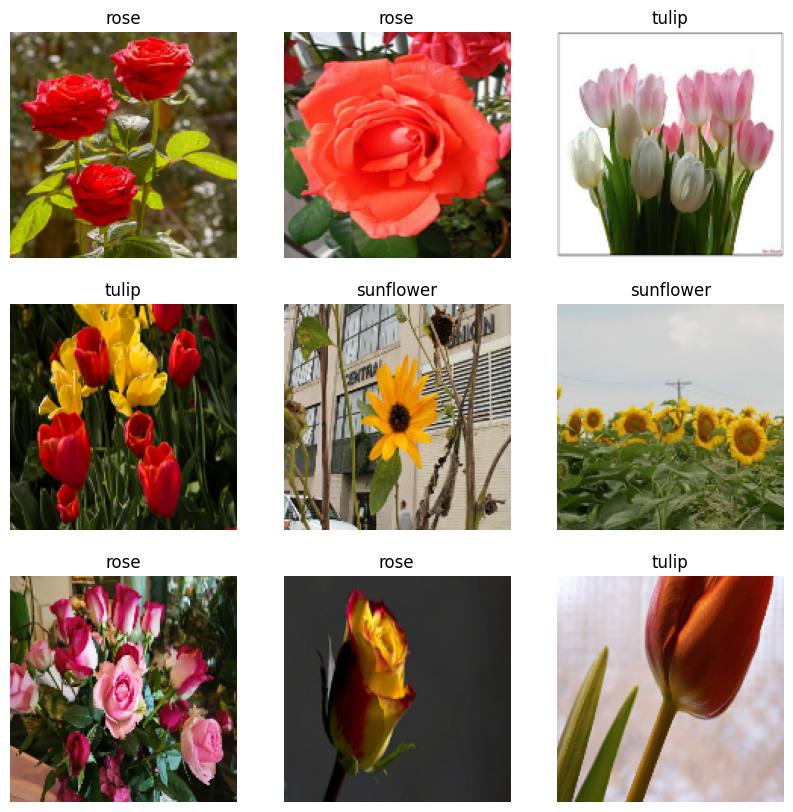

In [35]:
class_names = data_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

In [36]:
class_names = data_train.class_names

In [37]:
def contras(x,y):
    image = tf.image.random_hue(x, 0.2)
    return image,y

In [38]:
def brightness(x, y):
    image = tf.image.random_brightness(x,max_delta=0.05)
    return image,y

In [39]:
def flip(x,y):
    image = tf.image.random_flip_left_right(x)
    return image, y

In [40]:
data_train = data_train.map(contras).map(brightness).map(flip)

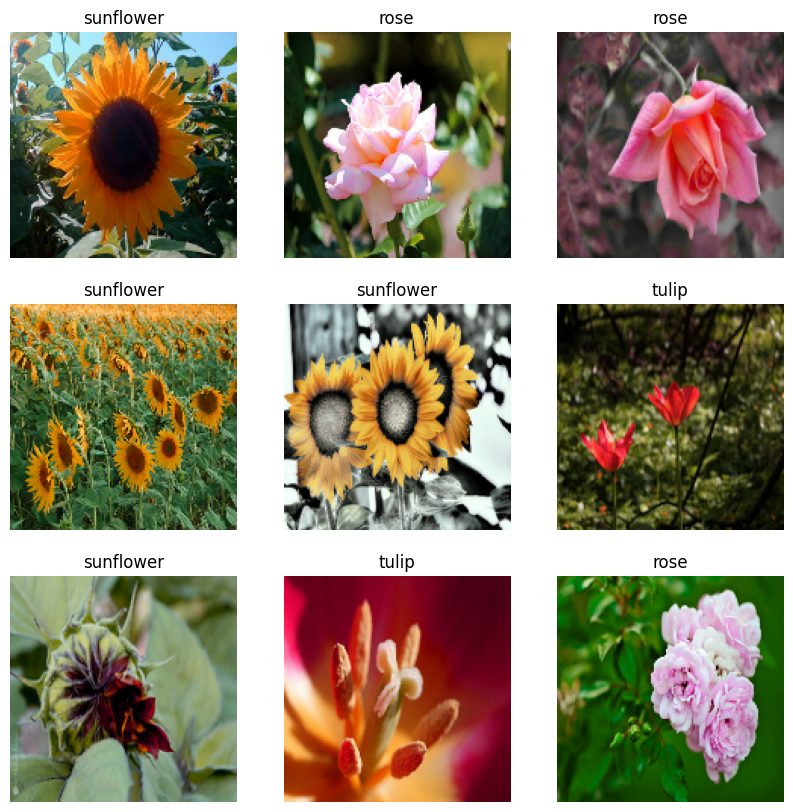

In [41]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

## 4. DATA ANALYSIS AND VISUALIZATION

### A. META DATA

In [42]:
data_train

<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [43]:
print("Class :", class_names)

Class : ['rose', 'sunflower', 'tulip']


## B. Normalisasi

In [44]:
img_size = 180

rezise_rescale = tf.keras.Sequential([
    layers.Resizing(img_size, img_size),
    layers.Rescaling(1./255)]
    )

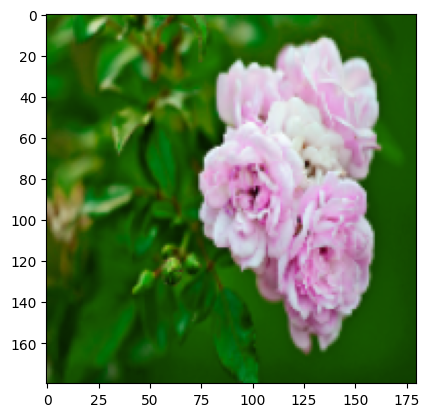

In [45]:
result = rezise_rescale(images)
plt.imshow(result[i].numpy())

### C. VISUALISASI DATA

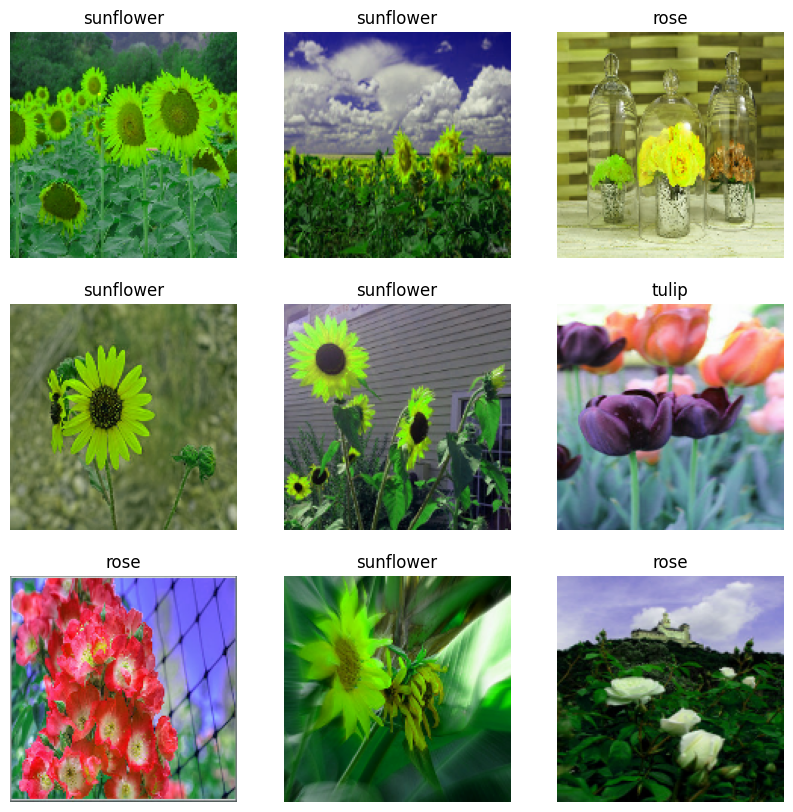

In [59]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(3):
  for i in range(9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

## 5. DATA MODELING

In [47]:
model = Sequential()

#input layer
model.add(Conv2D(64,(3,3),activation='relu',input_shape=[150,150,3]))

# Hidden Layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
                
# Output Layer
model.add(Dense(3,activation='softmax')) 

In [48]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [49]:
hasil = model.fit(data_train, epochs = 15, validation_data=data_val)

Epoch 1/15
54/54 [==============================] - 70s 1s/step - loss: 16.9365 - accuracy: 0.4410 - val_loss: 1.0369 - val_accuracy: 0.4767
Epoch 2/15
54/54 [==============================] - 71s 1s/step - loss: 1.0412 - accuracy: 0.4708 - val_loss: 1.0052 - val_accuracy: 0.4571
Epoch 3/15
54/54 [==============================] - 72s 1s/step - loss: 1.0245 - accuracy: 0.5169 - val_loss: 1.0572 - val_accuracy: 0.4235
Epoch 4/15
54/54 [==============================] - 73s 1s/step - loss: 0.9930 - accuracy: 0.4968 - val_loss: 1.0457 - val_accuracy: 0.4890
Epoch 5/15
54/54 [==============================] - 72s 1s/step - loss: 0.9148 - accuracy: 0.5704 - val_loss: 0.9363 - val_accuracy: 0.5405
Epoch 6/15
54/54 [==============================] - 72s 1s/step - loss: 0.7990 - accuracy: 0.6326 - val_loss: 0.8619 - val_accuracy: 0.6190
Epoch 7/15
54/54 [==============================] - 70s 1s/step - loss: 0.7161 - accuracy: 0.6776 - val_loss: 0.9083 - val_accuracy: 0.6239
Epoch 8/15
54/54 [=